In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
from pathlib import Path

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

from nerfstudio.utils.eval_utils import eval_setup
# from ns_extension.utils.grouping import GroupingClassifier
import collab_splats

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Taichi] version 1.7.4, llvm 15.0.4, commit b4b956fd, linux, python 3.10.18


[I 09/02/25 21:23:43.418 7466] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


Process ForkProcess-24:
Process ForkProcess-28:
Process ForkProcess-19:
Process ForkProcess-18:
Process ForkProcess-29:
Process ForkProcess-30:
Process ForkProcess-26:
Process ForkProcess-12:
Process ForkProcess-4:
Process ForkProcess-6:
Process ForkProcess-31:
Process ForkProcess-20:
Process ForkProcess-10:
Process ForkProcess-27:
Process ForkProcess-3:
Process ForkProcess-32:
Process ForkProcess-16:
Process ForkProcess-23:
Process ForkProcess-5:
Process ForkProcess-8:
Process ForkProcess-25:
Process ForkProcess-17:
Process ForkProcess-21:
Process ForkProcess-7:
Process ForkProcess-2:
Process ForkProcess-22:
Process ForkProcess-1:
Process ForkProcess-11:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last)

### Load configuration

In [2]:
# Path to the config for a trained model
load_config = '/workspace/fieldwork-data/rats/2024-07-11/environment/C0119/rade-features/2025-07-25_074037/config.yml'
# load_config = '/workspace/fieldwork-data/birds/2024-02-06/environment/C0043/rade-features/2025-07-25_040743/config.yml'
load_config = Path(load_config)

# config, pipeline, checkpoint_path, step = eval_setup(load_config)

### Question is whether to build grouping on top of the existing data?

In [3]:
from PIL import Image
import numpy as np

from collab_splats.utils.features import resize_image
from collab_splats.utils.segmentation import Segmentation

segmentation = Segmentation(
    backend='mobilesamv2',
    strategy='object',
    device='cuda',
)
segmentation.strategy = 'auto'

Using cache found in /workspace/models/hub/RogerQi_MobileSAMV2_main


checkpoint_load_scucess


### Load a classifier

In [3]:
from collab_splats.utils.grouping import GroupingClassifier, GroupingParams

# Path to the config for a trained model
load_config = '/workspace/fieldwork-data/rats/2024-07-11/environment/C0119/rade-features/2025-07-25_074037/config.yml'
load_config = Path(load_config)

grouping_params = GroupingParams(segmentation_backend='mobilesamv2', segmentation_strategy='object', front_percentage=0.2, iou_threshold=0.1, num_patches=32)
grouping_classifier = GroupingClassifier(load_config=load_config, params=grouping_params)

Loading NeRF pipeline and model...


[21:23:55] Auto image downscale factor of 2                                                 ]8;id=672148;file:///opt/conda/envs/nerfstudio/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=933267;file:///opt/conda/envs/nerfstudio/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#484\484]8;;\

[21:24:29] use color only optimization with sigmoid activation                                         ]8;id=528846;file:///opt/conda/envs/nerfstudio/lib/python3.10/site-packages/nerfstudio/models/splatfacto.py\splatfacto.py]8;;\:]8;id=118797;file:///opt/conda/envs/nerfstudio/lib/python3.10/site-packages/nerfstudio/models/splatfacto.py#213\213]8;;\

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
/workspace/fieldwork-data/rats/2024-07-11/environment/C0119/rade-features/2025-07-25_074037/nerfstudio_models/step-00002
9999.ckpt

Loading segmentation module...


Using cache found in /workspace/models/hub/RogerQi_MobileSAMV2_main


checkpoint_load_scucess


### Associate masks

In [17]:
grouping_classifier.params.debug = False

In [19]:
from collab_splats.utils.segmentation import mask_id_to_binary_mask


In [20]:
composite_mask = mask_id_to_binary_mask(composite_mask)

In [ ]:
composite_mask.shape

(16, 959, 539)

In [ ]:
dataloader = grouping_classifier.fixed_indices_dataloader(split="train")

Loading train ordered data...


In [25]:
print (np.unique(composite_mask))

[False  True]


In [90]:
grouping_classifier._reset_associations()

In [92]:
seg_results = grouping_classifier.associate()

Loading train ordered data...


Processing frames:   0%|          | 0/441 [00:00<?, ?it/s]

Processing frame 0


/workspace/collab-splats/collab_splats/utils/camera_utils.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(get_world2view_transform(R, T, trans, scale)).transpose(0, 1).cuda()

0: 1024x576 26 objects, 20.9ms
Speed: 3.1ms preprocess, 20.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


In [120]:
from collab_splats.utils.segmentation import create_composite_mask
composite_mask = create_composite_mask(seg_results)

Mask 0 has 315320 pixels
Mask 1 has 155 pixels
Mask 2 has 1075 pixels
Mask 3 has 35 pixels
Mask 4 has 2216 pixels
Mask 5 has 4252 pixels
Mask 6 has 5 pixels
Mask 7 has 157262 pixels
Mask 8 has 19485 pixels
Mask 9 has 327 pixels
Mask 10 has 409 pixels
Mask 11 has 942 pixels
Mask 12 has 766 pixels
Mask 13 has 5600 pixels
Mask 14 has 1095 pixels
Mask 15 has 1533 pixels
Mask 16 has 1084 pixels
Mask 17 has 488 pixels
Mask 18 has 3183 pixels
Mask 19 has 400 pixels
Mask 20 has 1269 pixels


In [119]:
np.unique(composite_mask)

array([ 0,  1,  2,  4,  5,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 20], dtype=uint8)

In [115]:
binary_new = mask_id_to_binary_mask(composite_mask)

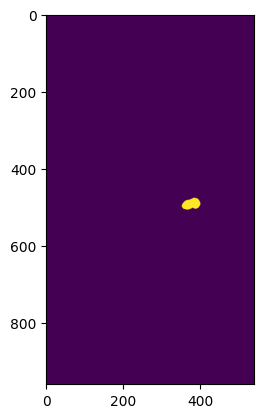

In [117]:
plt.imshow(binary_new[1])